<a href="https://colab.research.google.com/github/Alfi-Lukmanul/Data-Mining/blob/main/Klasifikasi_dengan_KNN_pada_Dataset_Pembeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Dataset Pembeli Negara - 1.csv')

In [4]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44,72000,0
1,Spain,27,48000,1
2,Germany,30,54000,0
3,Spain,38,61000,0
4,France,40,50000,1


In [5]:
x = dataset.iloc[:,[1,2]].values
y = dataset.iloc[:,-1].values

In [6]:
print(x)

[[   44 72000]
 [   27 48000]
 [   30 54000]
 [   38 61000]
 [   40 50000]
 [   35 58000]
 [   42 36000]
 [   48 89000]
 [   50 67000]
 [   37 83000]
 [   29 42000]
 [   46 45000]
 [   35 36000]
 [   36 40000]
 [   34 32000]
 [   29 40000]
 [   30 45000]
 [   45 55000]
 [   40 50000]
 [   26 39000]
 [   19 40000]
 [   33 50000]
 [   37 55000]
 [   38 46000]
 [   26 44000]
 [   30 35000]
 [   50 67000]
 [   38 58000]
 [   47 55000]
 [   26 32000]
 [   32 41000]
 [   39 57000]
 [   38 47000]
 [   44 68000]
 [   42 36000]
 [   40 25000]
 [   22 41000]
 [   35 58000]
 [   28 60000]
 [   45 75000]
 [   47 77000]
 [   21 36000]
 [   26 40000]
 [   33 50000]
 [   31 53000]
 [   39 74000]
 [   37 64000]
 [   38 35000]
 [   40 58000]]


In [ ]:
print(y)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
print(x_train)

In [ ]:
len(x_train)

In [10]:
len(x)

49

In [11]:
len(x_test)

10

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
print(x_train)

[[ 1.44114802 -0.43637114]
 [ 0.50216613  0.47128083]
 [ 1.17286748  1.30329513]
 [ 0.36802587  0.54691849]
 [ 0.6363064   0.54691849]
 [-0.70509629  0.24436784]
 [ 0.2338856   1.00074448]
 [ 0.6363064  -0.05818282]
 [-0.83923655 -0.81455946]
 [ 1.57528829  0.3200055 ]
 [ 0.2338856   0.3200055 ]
 [-0.70509629 -0.43637114]
 [-1.91235871 -1.11711011]
 [-2.18063924 -0.81455946]
 [-1.24165736 -0.81455946]
 [ 1.97770909  1.22765747]
 [ 0.09974533 -0.81455946]
 [-0.70509629 -1.19274778]
 [-0.03439494  0.54691849]
 [ 1.30700775  0.3200055 ]
 [ 0.6363064  -1.94912441]
 [-0.16853521 -1.41966077]
 [-0.97337682  0.69819382]
 [-1.10751709 -0.20945815]
 [-0.03439494 -1.11711011]
 [-0.30267548 -0.05818282]
 [-1.24165736 -0.5120088 ]
 [ 0.90458694 -1.11711011]
 [ 0.36802587 -0.36073347]
 [-1.77821844 -0.73892179]
 [-0.30267548 -0.05818282]
 [-1.24165736 -0.89019712]
 [ 0.2338856   2.43786009]
 [ 1.30700775  1.83275878]
 [ 0.50216613  1.75712111]
 [ 0.36802587  0.77383148]
 [ 1.17286748  1.60584579]
 

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
y_pred = classifier.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 2]
 [0 7]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


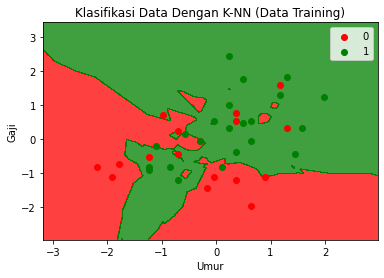

In [17]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:, 0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data Dengan K-NN (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


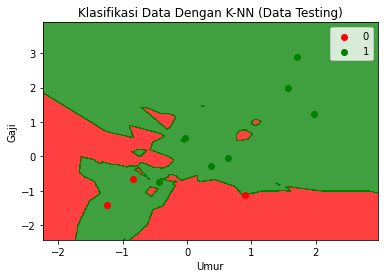

In [18]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:, 0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data Dengan K-NN (Data Testing)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()